In [28]:
# Import required libraries and dependencies
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [29]:
# Load the data into a Pandas DataFrame and make the index the "coin_id" column.
market_data_df = pd.read_csv("Resources/crypto_market_data.csv", index_col="coin_id")

# Display sample data
market_data_df.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [30]:
# Generate summary statistics
market_data_df.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


### Prepare the Data

In [31]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
scaler = StandardScaler()
#normalize data
normalized_data = scaler.fit_transform(market_data_df)

In [32]:
# Create a DataFrame with the scaled data
# Copy the crypto names from the original data
# Set the coinid column as index

scaled_df = pd.DataFrame(normalized_data,columns=market_data_df.columns,index=market_data_df.index)



# Display sample data
scaled_df.head()


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


### Find the Best Value for k Using the Original Scaled DataFrame.

In [33]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11
k_values = range(1,12)

# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
for k in k_values:
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
    kmean = KMeans(n_clusters=k,random_state=0)
# 2. Fit the model to the data using the scaled DataFrame
    kmean.fit(scaled_df)
# 3. Append the model.inertia_ to the inertia list
    inertia.append(kmean.inertia_)


# Create a dictionary with the data to plot the Elbow curve
elbowCurve = {'k':k_values, 'inertia':inertia}

# Create a DataFrame with the data to plot the Elbow curve
elbowDf = pd.DataFrame(elbowCurve)

# Display the DataFrame
elbowDf

c:\Users\jdhof\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1426: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\jdhof\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1426: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\jdhof\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1426: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\jdhof\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1426: UserWarning: KMeans is k

,k,inertia
0,1,287.000000
1,2,198.571818
2,3,145.635748
3,4,79.022435
4,5,66.217780
5,6,59.139070
6,7,48.406314
7,8,38.993588
8,9,34.400595
9,10,28.573603


<Axes: xlabel='k'>

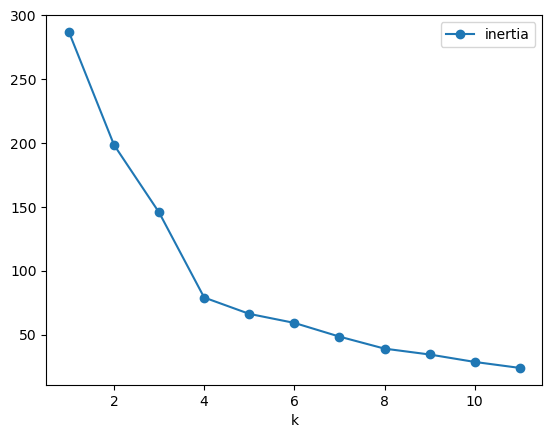

In [34]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
elbowDf.plot(x='k',y='inertia',kind='line',marker="o")

#### Answer the following question: 
**Question:** What is the best value for `k`?

**Answer:** The best vaule for k would be 4

### Cluster Cryptocurrencies with K-means Using the Original Scaled Data.

In [35]:
# Initialize the K-Means model using the best value for k
k_value = 4
k_means = KMeans(n_clusters=k_value,random_state=0)


In [36]:
# Fit the K-Means model using the scaled data
k_means.fit(scaled_df)


c:\Users\jdhof\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1426: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4, random_state=0)

In [37]:
# Predict the clusters to group the cryptocurrencies using the scaled data
clusters = k_means.predict(scaled_df)

# View the resulting array of cluster values.
clusters

array([2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 2, 0, 0, 3, 0, 0, 0, 0])

In [38]:
# Create a copy of the DataFrame
cluster_df = scaled_df.copy()

In [39]:
# Add a new column to the DataFrame with the predicted clusters
cluster_df['Clusters'] = clusters

# Display sample data
cluster_df.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,Clusters
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,2
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,2
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,0
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,0
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,2


<Axes: xlabel='price_change_percentage_24h', ylabel='price_change_percentage_7d'>

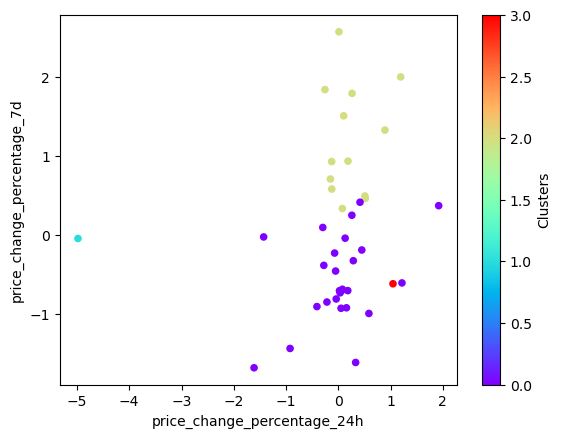

In [40]:
# Create a scatter plot using Pandas plot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`.
# Use "rainbow" for the color to better visualize the data.
cluster_df.plot.scatter(x='price_change_percentage_24h',y="price_change_percentage_7d",c='Clusters',colormap="rainbow")

### Optimize Clusters with Principal Component Analysis.

In [41]:
# Create a PCA model instance and set `n_components=3`.
pca = PCA(n_components=3)

In [42]:
# Use the PCA model with `fit_transform` on the original scaled DataFrame to reduce to three principal components.
pca_model = pca.fit_transform(scaled_df)
pca_df = pd.DataFrame(data=pca_model, columns=["PC1","PC2","PC3"], index=scaled_df.index)

# View the first five rows of the DataFrame. 
pca_df.head()

,PC1,PC2,PC3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715


In [43]:
# Retrieve the explained variance to determine how much information  can be attributed to each principal component.
ev = pca.explained_variance_ratio_
total_ev = ev.sum()
#Display explained variance and total explained variance
ev,total_ev

(array([0.3719856 , 0.34700813, 0.17603793]), 0.8950316570309841)

#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** 89.5%

### Find the Best Value for k Using the PCA Data

In [44]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11
k_values_pca = range(1,12)

# Create an empty list to store the inertia values
inertia_values_pca = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop: 
for k in k_values_pca:
    # 1. Create a KMeans model using the loop counter for the n_clusters
    kmeans_pca = KMeans(n_clusters=k,random_state=0)
    # 2. Fit the model to the data using PCA DataFrame.
    kmeans_pca.fit(pca_df)
    #3. Append the model.inertia_ to the inertia list
    inertia_values_pca.append(kmeans_pca.inertia_)

# Create a dictionary with the data to plot the Elbow curve
# Create a DataFrame with the data to plot the Elbow curve
elbow_df_pca = pd.DataFrame({'k': k_values_pca , 'inertia': inertia_values_pca})

# Display the DataFrame
elbow_df_pca


c:\Users\jdhof\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1426: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\jdhof\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1426: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\jdhof\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1426: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\jdhof\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1426: UserWarning: KMeans is k

,k,inertia
0,1,256.874086
1,2,168.811896
2,3,115.918077
3,4,49.665497
4,5,41.357314
5,6,30.796642
6,7,25.915457
7,8,21.890936
8,9,17.720699
9,10,13.838699


<Axes: xlabel='k'>

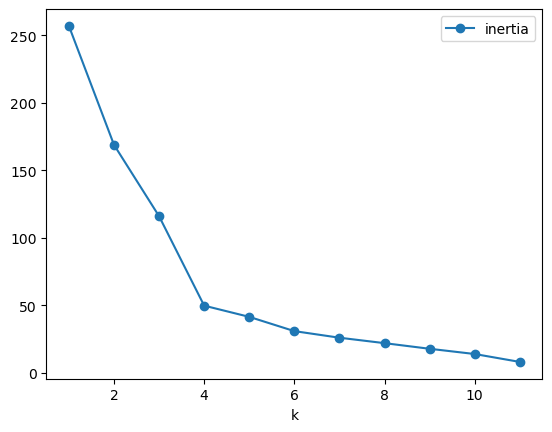

In [45]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
elbow_df_pca.plot(x='k',y='inertia',kind='line',marker="o")

#### Answer the following questions: 
* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:**  The best value is 4


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:**  No it does not differ

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [46]:
# Initialize the K-Means model using the best value for k
best_k = 4
kmeans_pca = KMeans(n_clusters=best_k, random_state=0)


In [47]:
# Fit the K-Means model using the PCA data
kmeans_pca.fit(pca_df)

c:\Users\jdhof\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1426: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4, random_state=0)

In [48]:
# Predict the clusters to group the cryptocurrencies using the PCA data
clusters_pca = kmeans_pca.predict(pca_df)

# Print the resulting array of cluster values.
clusters_pca

array([2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 2, 0, 0, 3, 0, 0, 0, 0])

In [49]:
# Create a copy of the DataFrame with the PCA data
pca_clustered_df = pca_df.copy()

# Add a new column to the DataFrame with the predicted clusters
pca_clustered_df["Cluster"] = clusters_pca

# Display sample data
pca_clustered_df.head()

,PC1,PC2,PC3,Cluster
coin_id,,,,
bitcoin,-0.600667,0.842760,0.461595,2
ethereum,-0.458261,0.458466,0.952877,2
tether,-0.433070,-0.168126,-0.641752,0
ripple,-0.471835,-0.222660,-0.479053,0
bitcoin-cash,-1.157800,2.041209,1.859715,2


<Axes: xlabel='PC1', ylabel='PC2'>

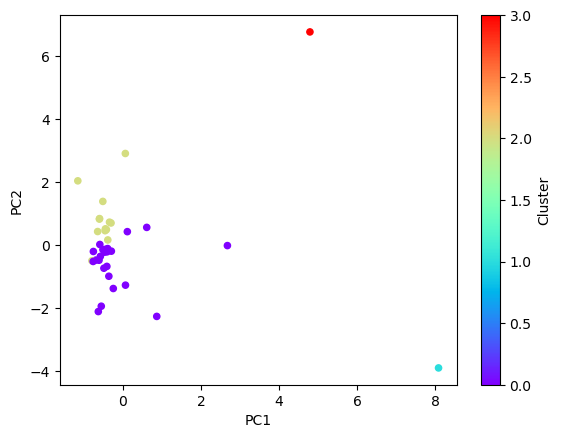

In [50]:
# Create a scatter plot using hvPlot by setting `x="PCA1"` and `y="PCA2"`. 
pca_clustered_df.plot.scatter(x="PC1",y='PC2',c="Cluster",colormap="rainbow")

### Determine the Weights of Each Feature on each Principal Component

In [51]:
# Use the columns from the original scaled DataFrame as the index.
weights = pd.DataFrame(pca.components_.T,columns=["PC1","PC2","PC3"],index=scaled_df.columns)
#Display weights
weights

,PC1,PC2,PC3
price_change_percentage_24h,-0.416728,0.358162,-0.218795
price_change_percentage_7d,-0.102432,0.227432,0.787670
price_change_percentage_14d,-0.009162,0.540415,0.349534
price_change_percentage_30d,0.191523,0.562182,-0.181744
price_change_percentage_60d,0.320365,0.434040,-0.361377
price_change_percentage_200d,0.594468,0.027735,0.039733
price_change_percentage_1y,0.568379,-0.150789,0.210541


#### Answer the following question: 

* **Question:** Which features have the strongest positive or negative influence on each component? 
 
* **Answer:** Price change percentage 200d and 1y have most positive influence on the PC1 while 24h and 7d have the strongest negative influence.  PC2 is dominated by 14d and 30d while has the most negative influence from 1y. Lastly PC3 is dominated most by 7d while has the most negative influence from 60d and 24h.
    